# Bikesharing Trip Analysis
October 6, 2022

*This is a personal portfolio project by Thamilini P.*

This project involves a fictional bikesharing company called Cyclistic. This company offers different pricings plans that targets two groups: casual riders and annual members. Financial Analysts have determined that annual memberships bring in higher profits for the company. Therefore, the marketing team aims to persuade casual riders into becoming members. This project will analyze the differences in how casual riders and members use cyclistic bikes.

### A breakdown of the 5 Phases of this project
* **[Ask Phase](#section-one)** : 
    - Define the problem
* **[Prepare Phase](#section-two) (Completed using R and SQL)** : 
    - Make sure the data is credible and unbiased 
    - Organize data 
    - save datasets as R dataframes
* **[Process Phase](#section-three)(Completed using R)** : 
    - Explore and clean data
    - Create and transform data
* **[Analyze Phase](#section-four)(Completed using R)** :
    - Format and transform data
    - Identify patterns and draw conclusions
    - Make predictions and [recommendations](#section-five)
    - Make data-driven decisions
* **Share Phase (Completed using Tableau)** :
    - Understand visulization
    - Create effective visuals
    - Bring data to life
    - Use Data storytelling
    - Communicate to help others understand results



<a id="section-one"></a>
## Ask Phase

### Purpose/Objective

Recommend strategies to convert casual riders into annual members by analyzing differences in bike usage.

<a id="section-two"></a>
## Prepare Phase

### Datasets License

Since Cyclistic is a fictional company, data was collected from Lyft Bikes and Scooters, LLC (“Bikeshare”). Bikeshare manages Chicago City's Divvy Bikesharing service. All Datasets was made available by the Bikeshare under this [License](https://ride.divvybikes.com/data-license-agreement). 

The datasets includes trip data from September 2021 to August 2022 (i.e. 12 months). Datasets were downloaded from [Link](https://divvy-tripdata.s3.amazonaws.com/index.html). Each csv file contained one month of trip data, therefore 12 csv files were downloaded in total. 


### Load R Packages

In [1]:
library(tidyverse) # metapackage of all tidyverse packages
library(skimr)
library(janitor)
library(lubridate)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### SQL Queries

Since each of the 12 csv files contained one month of trip data, I had twelve separate data tables. Each data table has the same column names and data types. 

Since each data table contained the same columns, I used SQL UNIONS (in Google BigQuery) to combine all the rows as one data table. Below is the SQL Query:

![SQL Union Query](https://github.com/Thamilini/Bikesharing-Trip-Analysis/blob/main/SQL_Union_QUERY.png)

I then saved the results of this Query as a new data table 202109_tripdata

Below is the first six rows of the data table.

In [2]:
head(read.csv("/kaggle/input/monthly-trip-data/202109-divvy-tripdata.csv"))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,,,,,41.89,-87.68,41.89,-87.67,casual
2,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,,,,,41.94,-87.64,41.98,-87.67,casual
3,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,,,,,41.81,-87.72,41.80,-87.72,casual
4,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,,,,,41.80,-87.72,41.81,-87.72,casual
5,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,,,,,41.88,-87.74,41.88,-87.71,casual
6,346DE323A2677DC0,electric_bike,2021-09-28 01:53:18,2021-09-28 02:00:02,,,,,41.87,-87.75,41.88,-87.74,casual


The started_at and ended_at columns are both datetime attributes. day_of_week column. The below SQL query creates a ride_length and day_of_week column.

![Create ride_length and day_of_week column](https://github.com/Thamilini/Bikesharing-Trip-Analysis/blob/main/SQL_Query_Create_Column.png)

I downloaded the results of this query as csv file and renamed it to 202109_202208_trip_data.csv

### Import dataset as a R dataframe

In [3]:
cyclistic_trip_data <- read_csv("/kaggle/input/cyclistic-trip-data/202109_202208_trip_data.csv")

Rows: 12000 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): ride_id, rideable_type, started_at, ended_at, start_station_name,...
dbl   (4): start_lat, start_lng, end_lat, end_lng
time  (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Data Credibility/Bias

Since Cyclistic is a fictional company, our best option is to get real world trip data. The datasets were made available from a reliable organization (Bikeshare who operates the Divvy Bikeshare service in Chicago city). 

The datasets contains trip data from September 2021 to August 2022, it is current and relevant. Due to data privacy issues we do not have riders' addresses or demographics, therefore we cannot verify biases.

<a id="section-three"></a>
## Process Phase

Let's explore the structure of the dataset.

In [4]:
str(cyclistic_trip_data)

spec_tbl_df [12,000 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:12000] "73445D403239209F" "41AF58170DFB61A6" "A1F2C92308007968" "7A9F76E93C25A0BA" ...
 $ rideable_type     : chr [1:12000] "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr [1:12000] "2021-09-21 15:09:23.000000 UTC" "2021-09-03 17:32:01.000000 UTC" "2021-11-10 16:27:02.000000 UTC" "2021-11-24 16:39:13.000000 UTC" ...
 $ ended_at          : chr [1:12000] "2021-09-21 16:40:03.000000 UTC" "2021-09-03 18:33:32.000000 UTC" "2021-11-10 17:04:28.000000 UTC" "2021-11-24 16:53:50.000000 UTC" ...
 $ start_station_name: chr [1:12000] "Kingsbury St & Kinzie St" NA "Leamington Ave & Hirsch St" NA ...
 $ start_station_id  : chr [1:12000] "KA1503000043" NA "307" NA ...
 $ end_station_name  : chr [1:12000] NA NA "Leamington Ave & Hirsch St" NA ...
 $ end_station_id    : chr [1:12000] NA NA "307" NA ...
 $ start_lat         : num [1:12000] 41.9 41.9 41.9 41.9 41.9

This tells us that the dataset has 15 columns and 12000 rows

#### Calculate Average and Max Ride Length

First convert ride length to seconds.

In [5]:
cyclistic_trip_data$ride_length <- difftime(cyclistic_trip_data$ended_at,cyclistic_trip_data$started_at,units = "secs")

Now we inspect the structure of our dataset to see our changes

In [44]:
str(cyclistic_trip_data)

head(cyclistic_trip_data)

spec_tbl_df [12,000 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:12000] "73445D403239209F" "41AF58170DFB61A6" "A1F2C92308007968" "7A9F76E93C25A0BA" ...
 $ rideable_type     : chr [1:12000] "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr [1:12000] "2021-09-21 15:09:23.000000 UTC" "2021-09-03 17:32:01.000000 UTC" "2021-11-10 16:27:02.000000 UTC" "2021-11-24 16:39:13.000000 UTC" ...
 $ ended_at          : chr [1:12000] "2021-09-21 16:40:03.000000 UTC" "2021-09-03 18:33:32.000000 UTC" "2021-11-10 17:04:28.000000 UTC" "2021-11-24 16:53:50.000000 UTC" ...
 $ start_station_name: chr [1:12000] "Kingsbury St & Kinzie St" NA "Leamington Ave & Hirsch St" NA ...
 $ start_station_id  : chr [1:12000] "KA1503000043" NA "307" NA ...
 $ end_station_name  : chr [1:12000] NA NA "Leamington Ave & Hirsch St" NA ...
 $ end_station_id    : chr [1:12000] NA NA "307" NA ...
 $ start_lat         : num [1:12000] 41.9 41.9 41.9 41.9 41.9

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
73445D403239209F,classic_bike,2021-09-21 15:09:23.000000 UTC,2021-09-21 16:40:03.000000 UTC,Kingsbury St & Kinzie St,KA1503000043,NA,NA,41.88918,-87.63851,NA,NA,casual,5440,Tuesday
41AF58170DFB61A6,electric_bike,2021-09-03 17:32:01.000000 UTC,2021-09-03 18:33:32.000000 UTC,NA,NA,NA,NA,41.91000,-87.76000,41.91,-87.75,casual,3691,Friday
A1F2C92308007968,electric_bike,2021-11-10 16:27:02.000000 UTC,2021-11-10 17:04:28.000000 UTC,Leamington Ave & Hirsch St,307,Leamington Ave & Hirsch St,307,41.91000,-87.75000,41.91,-87.75,casual,2246,Wednesday
7A9F76E93C25A0BA,electric_bike,2021-11-24 16:39:13.000000 UTC,2021-11-24 16:53:50.000000 UTC,NA,NA,NA,NA,41.92000,-87.75000,41.91,-87.75,member,877,Wednesday
95EF8C93C5A9289B,electric_bike,2021-11-08 19:17:13.000000 UTC,2021-11-08 19:37:16.000000 UTC,NA,NA,NA,NA,41.93000,-87.75000,41.91,-87.75,casual,1203,Monday
63C490ABC76D9C65,electric_bike,2021-10-30 17:54:07.000000 UTC,2021-10-30 18:16:26.000000 UTC,Leamington Ave & Hirsch St,307,NA,NA,41.91000,-87.75000,41.91,-87.75,casual,1339,Saturday


Now we must convert the ride_length column to numeric so that we can perform calculations on it. We can use the class() function to check if we successfully converted the datatype.

In [7]:
cyclistic_trip_data$ride_length <- as.numeric(cyclistic_trip_data$ride_length)

Now we calculate the mean and max ride length (in seconds).

In [8]:
mean_ride_length <- mean(cyclistic_trip_data$ride_length)
print(mean_ride_length)
max_ride_length <-max(cyclistic_trip_data$ride_length)
print(max_ride_length)
min_ride_length <- min(cyclistic_trip_data$ride_length)
print(min_ride_length)

[1] 905.7247
[1] 63098
[1] 1


Let's explore the structure of this dataframe using skim_without_charts(). This function will list column names, its datatype, number of missing values, and summary statistics.

In [9]:
skim_without_charts(cyclistic_trip_data)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ride_id,0,1.0000000,16,16,0,12000,0,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,NA,NA,NA,NA,NA,NA
3,character,started_at,0,1.0000000,30,30,0,11995,0,NA,NA,NA,NA,NA,NA,NA
4,character,ended_at,0,1.0000000,30,30,0,11997,0,NA,NA,NA,NA,NA,NA,NA
5,character,start_station_name,4814,0.5988333,10,53,0,586,0,NA,NA,NA,NA,NA,NA,NA
6,character,start_station_id,4814,0.5988333,3,12,0,582,0,NA,NA,NA,NA,NA,NA,NA
7,character,end_station_name,4837,0.5969167,10,53,0,572,0,NA,NA,NA,NA,NA,NA,NA
8,character,end_station_id,4837,0.5969167,3,35,0,565,0,NA,NA,NA,NA,NA,NA,NA
9,character,member_casual,0,1.0000000,6,6,0,2,0,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values             
Name                       cyclistic_trip_data
Number of rows             12000              
Number of columns          15                 
_______________________                       
Column type frequency:                        
  character                10                 
  numeric                  5                  
________________________                      
Group variables            None               

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      n_missing complete_rate min max empty n_unique whitespace
 1 ride_id                    0         1      16  16     0    12000          0
 2 rideable_type              0         1      11  13     0        3          0
 3 started_at                 0         1      30  30     0    11995          0
 4 ended_at                   0         1      30  30     0    11997          0
 5 star

Let's also check for duplicate rows

In [10]:
get_dupes(cyclistic_trip_data)

No variable names specified - using all columns.


No duplicate combinations found of: ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, ... and 6 other variables



ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,dupe_count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>


#### Calculate average ride length based on Membership Type.

In [11]:
aggregate(cyclistic_trip_data$ride_length ~ cyclistic_trip_data$member_casual, FUN = mean)
aggregate(cyclistic_trip_data$ride_length ~ cyclistic_trip_data$member_casual, FUN = median)
aggregate(cyclistic_trip_data$ride_length ~ cyclistic_trip_data$member_casual, FUN = max)
aggregate(cyclistic_trip_data$ride_length ~ cyclistic_trip_data$member_casual, FUN = min)

cyclistic_trip_data$member_casual,cyclistic_trip_data$ride_length
<chr>,<dbl>
casual,1095.8415
member,719.9308


cyclistic_trip_data$member_casual,cyclistic_trip_data$ride_length
<chr>,<dbl>
casual,692
member,494


cyclistic_trip_data$member_casual,cyclistic_trip_data$ride_length
<chr>,<dbl>
casual,30808
member,63098


cyclistic_trip_data$member_casual,cyclistic_trip_data$ride_length
<chr>,<dbl>
casual,1
member,1


<a id="section-four"></a>
## Analyze Phase

Let's transform data to draw conclusions

#### Average Ride Length by Weekday

Let's compare the average ride length per weekday. First lets order the week days.

`summarise()` has grouped output by 'day_of_week'. You can override using the
`.groups` argument.


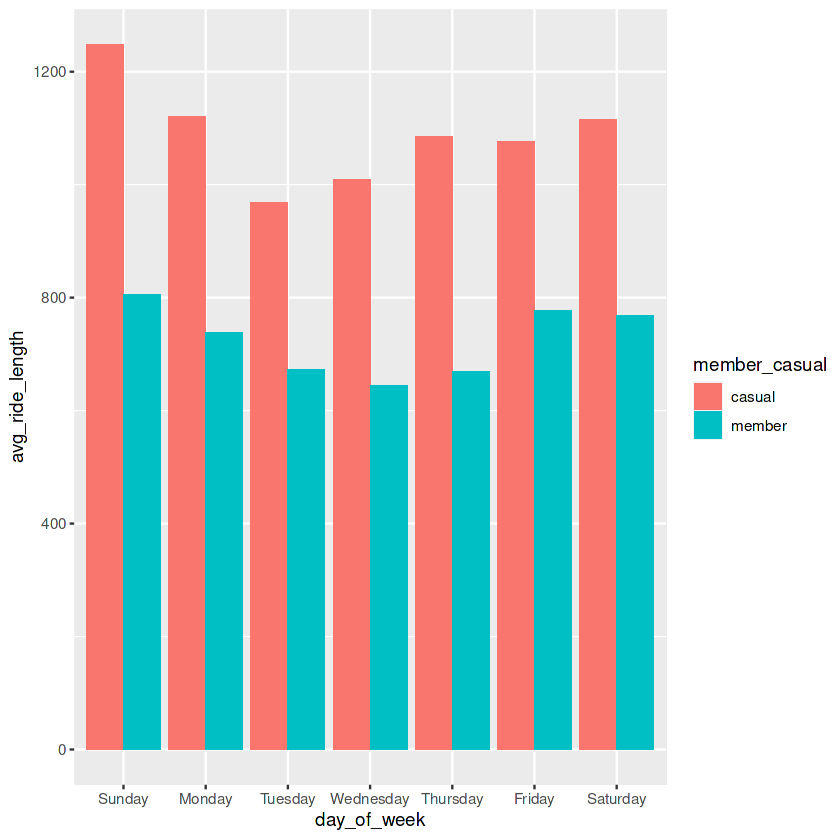

In [40]:
cyclistic_trip_data$day_of_week <- ordered(cyclistic_trip_data$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

cyclistic_trip_data %>% 
  group_by(day_of_week,member_casual) %>% 
  summarise(avg_ride_length=mean(ride_length)) %>%
  ggplot(aes(x=day_of_week, y=avg_ride_length,fill=member_casual))+geom_col(position = "dodge")

***Overall the average duration by weekday is higher for casual riders then members.***

i.e. casual riders use the bikes for a longer duration then members.

#### Mode of Day of Week

Determine the Week day with highest frequency

# A tibble: 7 × 2
  day_of_week     n
  <ord>       <int>
1 Tuesday      1890
2 Sunday       1748
3 Thursday     1740
4 Monday       1730
5 Saturday     1729
6 Friday       1599
7 Wednesday    1564


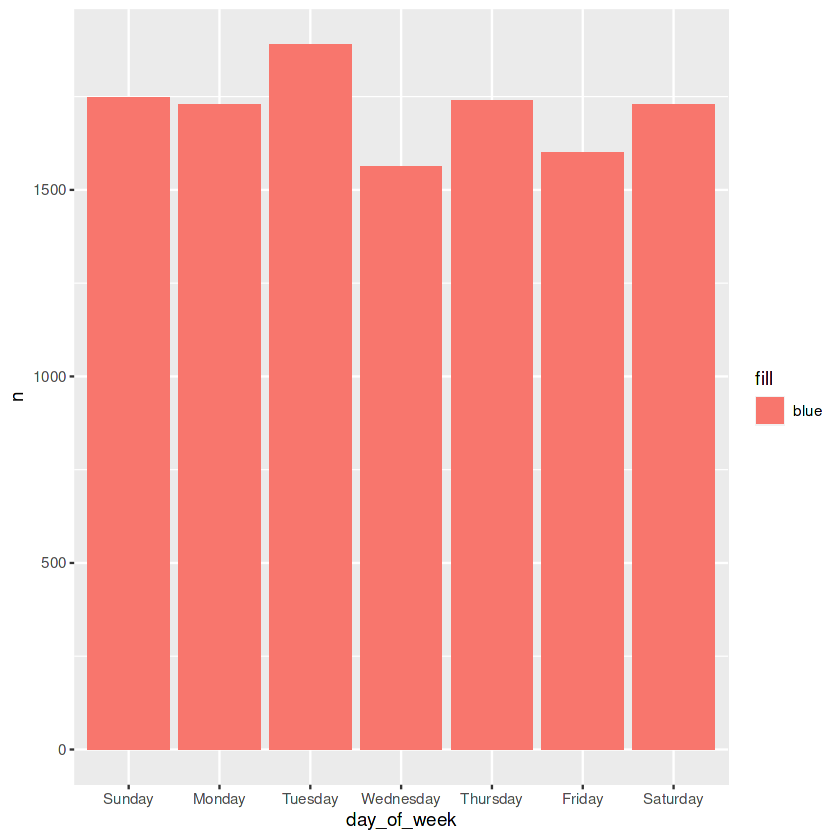

In [43]:
week_day_frequency_table <- cyclistic_trip_data %>% 
  group_by(day_of_week) %>% 
  tally() %>% 
  arrange(desc(n))
print(week_day_frequency_table) 

ggplot(week_day_frequency_table) + geom_bar(aes(day_of_week,n,fill="blue"),stat="identity")

It's clear that Tuesday has the most bike trips.

#### Average and Number of Rides by Weekday

In [14]:
cyclistic_trip_data %>% 
  group_by(member_casual,day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,day_of_week)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sunday,1029,1248.3771
casual,Monday,785,1119.8420
casual,Tuesday,868,967.9896
casual,Wednesday,695,1008.9122
casual,Thursday,797,1085.3237
casual,Friday,769,1076.4031
casual,Saturday,988,1114.9939
member,Sunday,719,806.1669
member,Monday,945,737.9333


#### Number of rides by rider type plot visualization

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


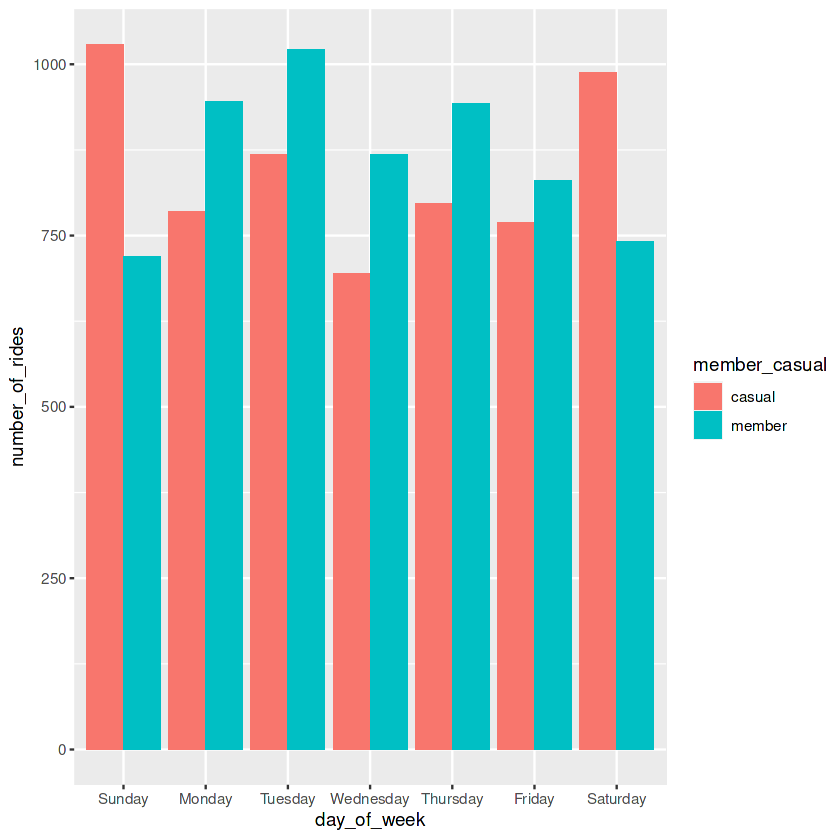

In [15]:
cyclistic_trip_data %>% 
  group_by(member_casual,day_of_week) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,day_of_week) %>% 
  ggplot(aes(x=day_of_week, y=number_of_rides,fill=member_casual))+geom_col(position = "dodge")

***The number of rides by casual riders exceeds members on Sundays and Saturdays only. Monday to Friday, members complete more rides than casual riders.***

#### Ridership Data by Month

#### Number of Rides by Month

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


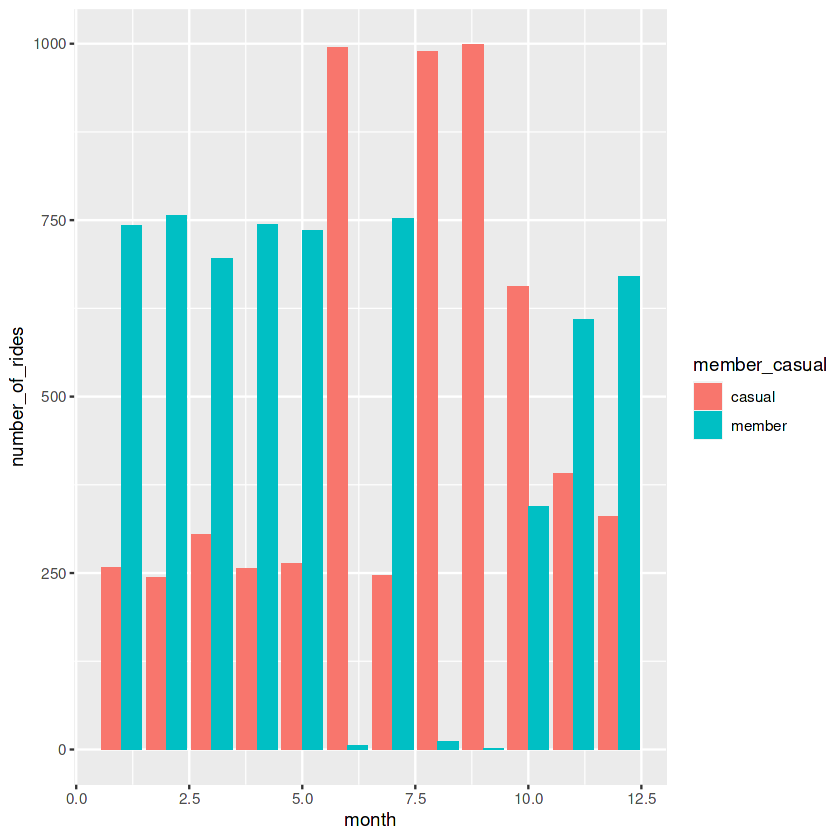

In [45]:
cyclistic_trip_data$month <- month(as.POSIXlt(cyclistic_trip_data$started_at))

cyclistic_trip_data %>% 
  group_by(member_casual,month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
  arrange(member_casual,month) %>% 
  ggplot(aes(x=month, y=number_of_rides,fill=member_casual))+geom_col(position = "dodge")

***This plot shows a significant increase in number of rides by casual members during the months of June,July, August,and September (i.e. Summer and Fall months). In contrast, there is very little number of rides by members during these months.***

#### Average Duration by Month

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


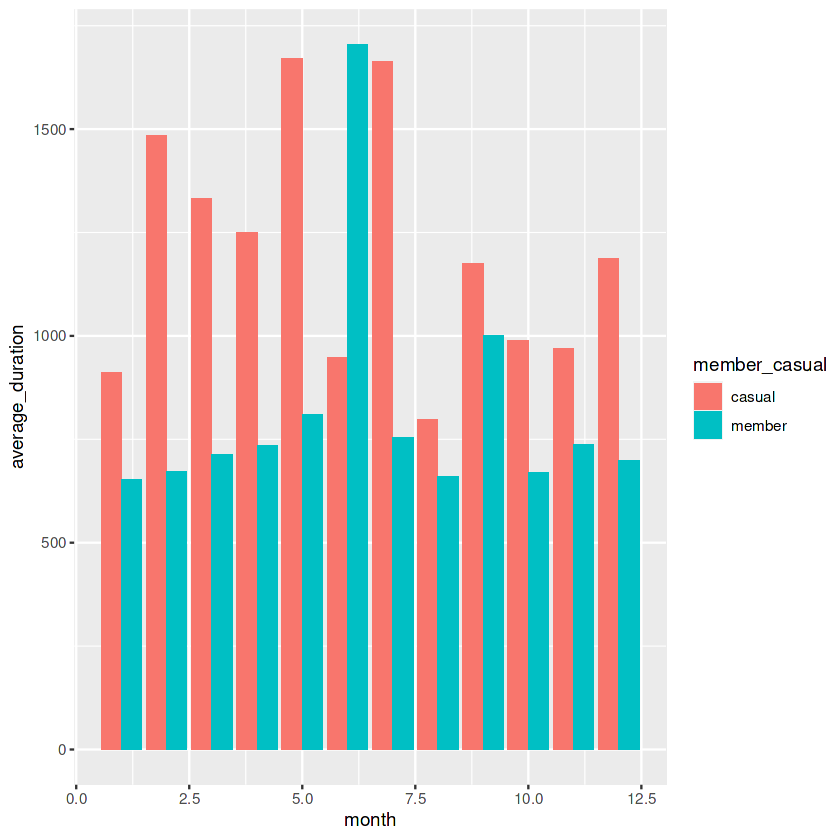

In [46]:
cyclistic_trip_data %>% 
  group_by(member_casual,month) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual,month) %>% 
  ggplot(aes(x=month, y=average_duration,fill=member_casual))+geom_col(position = "dodge")

***Overall the monthly average ride duration is higher for casual riders except on June***

#### Ridership Type by Rideable Type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


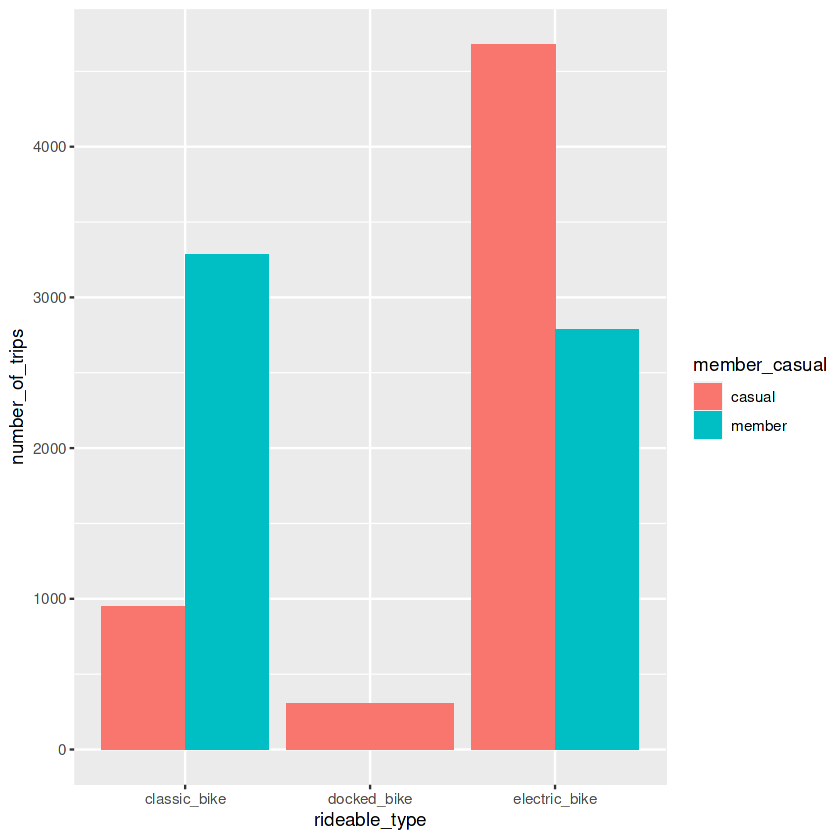

In [47]:
cyclistic_trip_data %>% 
  group_by(member_casual,rideable_type) %>% 
  summarise(number_of_trips = n(),average_duration = mean(ride_length)) %>% 
  arrange(member_casual,rideable_type) %>% 
  ggplot(mapping = aes(x=rideable_type,y=number_of_trips,fill=member_casual))+geom_col(position = "dodge") 

***This visualization shows that causal riders use electric bike and docked bike more often then members.***

<a id="section-five"></a>
#### Recommendations

* **Insight**: Casual Riders ride for longer durations than Annual Members
  + **Recommendations**: 
    - Offer a membership with discounted price for longer ride durations

* **Insight**: Casual Riders' frequency of rides is highest during summer and fall months.
  + **Recommendations**: 
    - Increase marketing during summer and fall months.
    - Consider discounted membership for summer and fall months only.
    
* **Insight**: Casual Riders prefer using Electric Bikes and Annual Members prefer using Classic Bikes. Docked Bikes have the lowest frequency of Rides
  + **Recommendations**:
    - Replace Docked Bikes with Electric Bikes.
    - Offer discounted membership for Electric Bikes
